**ECS7024 Statistics for Artificial Intelligence and Data Science:  Coursework 1**



**Table of Contents**

* [Chapter 1: Introduction](#chapter-1-introduction)
    * [Section 1.1. The Dataset](#section-11-the-dataset)
* [Chapter 2: Requirements](#chapter-2-requirements)
    * [Section 2.1. Part 1: Bar Chart of the Age Profile](#section-21-part-1-bar-chart-of-the-age-profile)
        * [2.1.1. Total Population of England](#sub-section-211-total-population-of-england)
        * [2.1.2. Comparison of LSOAs](#sub-section-212-comparison-of-lsoas)
        * [2.1.3. Explanation for differences in age distribution](#sub-section-213-explanation-for-differences-in-age-distribution)
    * [Section 2.2. Part 2: Distribution of the Younger, Older and Median Ages in Each LSOA](#section-22-part-2-distribution-of-the-younger-older-and-median-ages-in-each-lsoa)
        * [2.2.1. Adding younger, older residents and median ages to data frame](#sub-section-221-adding-younger-older-residents-and-median-ages-to-data-frame)
        * [2.2.2. Summary statistics](#sub-section-222-summary-statistics)
        * [2.2.3. Median age for England](#sub-section-223-median-age-for-england)
    * [Section 2.3. Part 3: Comparing the Median Age Distributions by Area Type](#section-23-part-3-comparing-the-median-age-distributions-by-area-type)
        * [2.3.1. Add type of area to data frame](#sub-section-231-add-type-of-area-to-data-frame)
        * [2.3.2. Distributions of median age for each area type](#sub-section-232-distributions-of-median-age-for-each-area-type)
        * [2.3.3. Differences of distributions of median ages](#sub-section-233-differences-of-distributions-of-median-ages)
    * [Section 2.4. Part 4: Classification of Unusual Areas by Proportions](#section-24-classification-of-unusual-areas-by-proportions)
        * [2.4.1. Scatter plot of younger vs. older residents](#sub-section-241-scatter-plot-of-younger-vs-older-residents)
        * [2.4.2. Shape of scatter plot](#sub-section-242-shape-of-scatter-plot)
        * [2.4.3. Identify and define extreme areas](#sub-section-243-identify-and-define-extreme-areas)
        * [2.4.3. Plot counts of area class per area type](#sub-section-243-plot-counts-of-area-class-per-area-type)
          


# Chapter 1: Introduction 
## The Dataset(s)
The data is based on ‘lower layer
super output areas’ (LSOA); see the description from the Office for National Statistics (ONS)
at https://www.ons.gov.uk/methodology/geography/ukgeographies/statisticalgeographies.
There are 33,755 LSOA in England.

The data were obtained from https://www.nomisweb.co.uk/sources/census_2021_bulk
(dataset TS007A) with some changes: 
1. Data for Wales has been deleted 
2. Columns have been renamed to ensure there are no spaces
3. The PartOfCode and PartOfName have been added.

The variables used are:

  | Variable Name | Type     | Description |
  |:-----------------|:--------|:---------------------------:|
  | LSOAName         | String  | Name of the LSOA |
  | LSOACode         | String  |Code of the LSOA|
  | PartOfCode       | String  | Code of a larger area containing this LSOA|
  | PartOfName       | String  | Name of the larger area containing this LSOA |
  | Total            | Integer | Total number of usual residents in this LSOA at the time of the 2021 census. |
  | Age4Under, Age5to9, Age10to14, Age15to19, Age20to24, Age25to29, Age30to34, Age35to39, Age40to44, Age45to49, Age50to54| Integer | Breakdown of the number of usual residents in this LSOA at the time of the 2021 census in 5 year age ranges (plus an open-ended range for ages 85 and over).| 
| Age55to59, Age60to64, Age65to69, Age70to74, Age75to79, Age80to84, Age85Over  | Integer | Breakdown of the number of usual residents in this LSOA at the time of the 2021 census in 5 year age ranges (plus an open-ended range for ages 85 and over).|

# Chapter 2: Requirements

In [112]:
import pandas as pd # Import pandas package to study data set
eng= pd.read_csv('LSOA_data.csv', index_col= 'LSOACode') # Read csv file containing data


## Part 1: Bar Chart of the Age Profile 
The aim of this section is to show the proportions of a population in each age range.

### Total Population of England 

The total population of England is: 56490091


<Axes: title={'center': 'Proportion of England population in each age range '}>

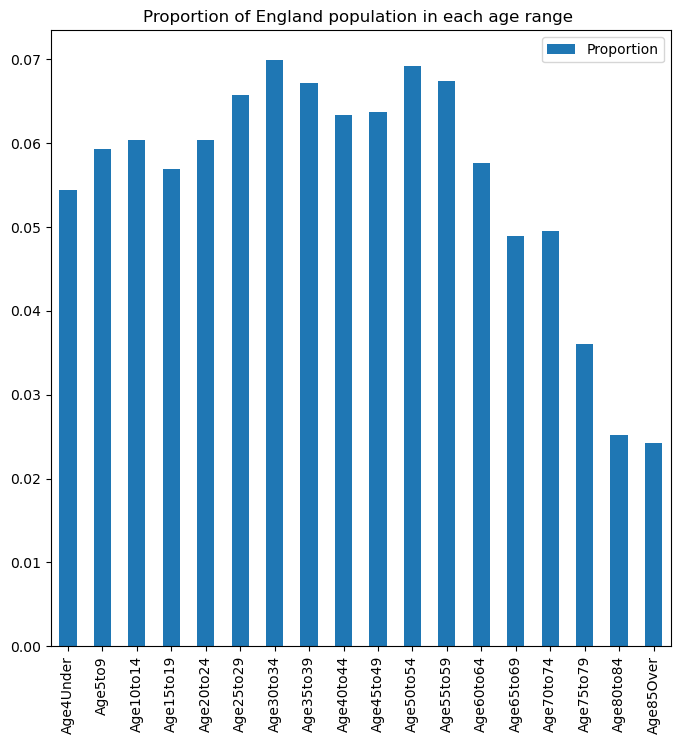

In [113]:
#Total Population of England
total= eng.Total.sum()
print('The total population of England is:', total)

# Plot a bar chart showing the proportions of the total England population in each age range 
new_eng= eng.sum(numeric_only=True) # Sums all rows containing numbers, i.e. gets total population in each age range

new_eng_prop = pd.DataFrame(data=new_eng.loc['Age4Under':'Age85Over'] / total, columns=['Proportion']) #Creates a dataframe with proportions

new_eng_prop.plot(kind='bar', figsize=(8,8), title='Proportion of England population in each age range ')

### Comparison of LSOAs <a id="sub_section_2_1_2"></a>
Using a bar chart, we compare the population of each age range for the following 
LSOAs: E01005044 (Bury 026E), E01020395 (Dorset 024A) and E01009136
(Birmingham 014E) and the total population of England

We use these proportions so that the 
differences in total populations in the three LSOAs and England do not matter.

<Axes: title={'center': 'Proportion of residents by age range in Bury, Dorset, Birmingham and England '}>

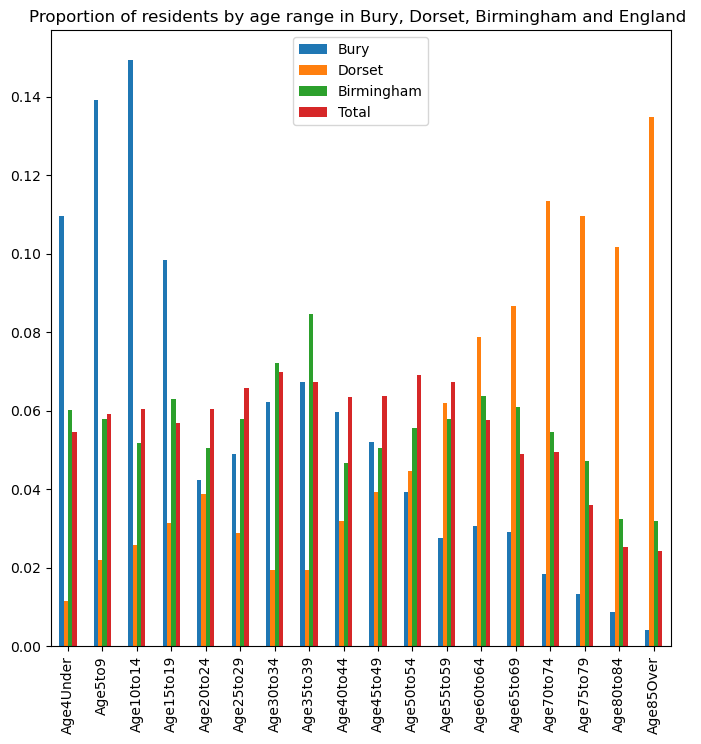

In [114]:
eng.columns # Get names of all columns

lsoa1 = eng.loc['E01005044', [ 'Age4Under', 'Age5to9',
       'Age10to14', 'Age15to19', 'Age20to24', 'Age25to29', 'Age30to34',
       'Age35to39', 'Age40to44', 'Age45to49', 'Age50to54', 'Age55to59',
       'Age60to64', 'Age65to69', 'Age70to74', 'Age75to79', 'Age80to84',
       'Age85Over']]

lsoa2 = eng.loc['E01020395', [ 'Age4Under', 'Age5to9',
       'Age10to14', 'Age15to19', 'Age20to24', 'Age25to29', 'Age30to34',
       'Age35to39', 'Age40to44', 'Age45to49', 'Age50to54', 'Age55to59',
       'Age60to64', 'Age65to69', 'Age70to74', 'Age75to79', 'Age80to84',
       'Age85Over']]
lsoa3 = eng.loc['E01009136', [ 'Age4Under', 'Age5to9',
       'Age10to14', 'Age15to19', 'Age20to24', 'Age25to29', 'Age30to34',
       'Age35to39', 'Age40to44', 'Age45to49', 'Age50to54', 'Age55to59',
       'Age60to64', 'Age65to69', 'Age70to74', 'Age75to79', 'Age80to84',
       'Age85Over']]


lsoa1a = lsoa1 / lsoa1.sum() # Use proportions so that the differences in total populations in the three LSOAs and England do not matter
lsoa2a = lsoa2 / lsoa2.sum()
lsoa3a = lsoa3 / lsoa3.sum() 
#lsoa3a.plot(kind='bar') # Using a bar chart, compare the population of each age range for E01009136 (Birmingham 014E)

# Using a bar chart, compare the population of each age range for the total population of England
eng_area= pd.DataFrame(data={'Bury': lsoa1a, 'Dorset': lsoa2a,'Birmingham': lsoa3a, 'Total': new_eng[1:]/ total})
eng_area.plot(kind='bar', figsize=(8,8), title='Proportion of residents by age range in Bury, Dorset, Birmingham and England ')

###  Explanation of differences in age distribution 

Age distribution in certain areas may differ from the national average due to several factors:
- Geographical Location: Areas further from city centres may have a higher proportion of older residents, while locations with schools, businesses, and larger neighborhoods tend to attract younger people and families.

- Type of Terrain and Employment Opportunities: The nature of work available, influenced by the local terrain, may shape the resident population. For example, areas with agricultural or industrial work may have different age distributions than urban, office-driven areas.

- Migration Patterns: Influxes of young professionals, students, or retirees due to work, education, or lifestyle preferences can skew the local age distribution.

- Attractive Features for Specific Age Groups: Coastal areas or vacation destinations may attract retirees, while urban areas with job opportunities are more likely to house working-age people and families.

## Part 2: Distribution of the Younger, Older and Median Ages in Each LSOA 

### Adding younger, older residents and median ages to data frame 
    A. Add a new variable to the dataframe, showing proportion of younger residents in each LSOA: These are the counts in the first four age groups (Age4Under, Age5to9, Age10to14, Age15to19), divided by the total for the LSO area.

    B. Add a new variable to the dataframe, showing proportion of older residents in each LSOA: These are the counts in the last five age groups, starting with Age65to69.



In [115]:
younger_eng  =(eng.Age5to9+ eng.Age10to14+ eng.Age10to14+ eng.Age15to19 )/ eng.Total #Create a variable with proportion of younger residents in each LSOA

older_eng= (eng.Age65to69+ eng.Age70to74+ eng.Age75to79+ eng.Age80to84 + eng.Age85Over )/ eng.Total #Create a variable with proportion of younger residents in each LSOA

#Add the new columns to the data frame with column names 'YoungerResidents' and 'OlderResidents'
eng['YoungerResidents']= younger_eng
eng['OlderResidents']= older_eng
eng


,LSOAName,PartOfCode,PartOfName,Total,Age4Under,Age5to9,Age10to14,Age15to19,Age20to24,Age25to29,...,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over,YoungerResidents,OlderResidents
LSOACode,,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,E09000001,City of London,1473,52,34,32,23,90,159,...,89,73,83,119,102,57,57,35,0.082145,0.251188
E01000002,City of London 001B,E09000001,City of London,1384,33,24,22,31,100,166,...,122,88,87,76,69,59,43,30,0.071532,0.200145
E01000003,City of London 001C,E09000001,City of London,1613,39,32,33,23,96,187,...,155,118,111,86,85,50,31,33,0.075015,0.176689
E01000005,City of London 001E,E09000001,City of London,1101,52,45,35,89,118,97,...,87,82,67,35,26,17,14,12,0.185286,0.094460
E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,1842,153,127,110,122,124,130,...,121,85,70,66,41,18,17,16,0.254615,0.085776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E01035758,Vale of White Horse 014H,E07000180,Vale of White Horse,1169,39,45,58,38,63,91,...,81,57,49,57,70,46,70,77,0.170231,0.273738
E01035759,Vale of White Horse 015G,E07000180,Vale of White Horse,1519,116,107,82,66,62,113,...,111,106,102,56,75,58,29,32,0.221856,0.164582
E01035760,Vale of White Horse 015H,E07000180,Vale of White Horse,1610,206,152,97,49,59,161,...,41,30,24,14,15,13,20,33,0.245342,0.059006


    C.  Calculate an estimate of the median age in the LSOA. 
There are 3 calculation steps:
* Step 1: Calculate cumulative sum of each row and divide by total to get proportions
* Step 2: Find first age range with cumulative value >= 0.50
* Step 3: Interpolate within obtained age range to extract median

In [116]:
import numpy as np #import numpy package to use functions like .cumsum()

eng_ages= eng.loc[:,[ 'Age4Under', 'Age5to9',
       'Age10to14', 'Age15to19', 'Age20to24', 'Age25to29', 'Age30to34',
       'Age35to39', 'Age40to44', 'Age45to49', 'Age50to54', 'Age55to59',
       'Age60to64', 'Age65to69', 'Age70to74', 'Age75to79', 'Age80to84',
       'Age85Over']] #Create a data frame only containing 'age columns' 

#Step 1: Calculate cumulative sum of each row and divide by total to get proportions
    # Calculate cumulative totals of ages data frame
eng_ages_cum= np.cumsum(eng_ages, axis=1)

    # Divide cumulative totals by total number of individuals in each age borough
eng_ages_cumtotals= eng_ages_cum.div(eng_ages_cum['Age85Over'], axis=0)
eng_ages_cumtotals

# Step 2 & 3. Create function to extract a list of medians for each LSOA
    # Find age range with cumulative value >= 0.50 
def findMedian(eng_ages_cumtotals):
    median= None
    medians=[]
    result= None

    for index1 in range(eng_ages_cumtotals.shape[0]): 
        for index2 in range(eng_ages_cumtotals.shape[1]):
            if eng_ages_cumtotals.iloc[index1, index2] > 0.50:
                median_range=eng_ages_cumtotals.columns[index2]
    # Interpolate within obtained range to extract median value/Borough           
                prev_fract= eng_ages_cumtotals.iloc[index1, index2-1]
                fract_increase= eng_ages_cumtotals.iloc[index1, index2]- prev_fract
                remaining_fract= 0.50- prev_fract
                result=int(eng_ages_cumtotals.columns[index2][3:5])+  5* (remaining_fract/fract_increase)
                median= result.item()
                medians.append(median)
                break  
            
    return medians
    
median_LSOA= findMedian(eng_ages_cumtotals) 

# Add list as a new column called 'Median Age' to the existing eng dataframe
eng['Median Age']= median_LSOA
eng


,LSOAName,PartOfCode,PartOfName,Total,Age4Under,Age5to9,Age10to14,Age15to19,Age20to24,Age25to29,...,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over,YoungerResidents,OlderResidents,Median Age
LSOACode,,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,E09000001,City of London,1473,52,34,32,23,90,159,...,73,83,119,102,57,57,35,0.082145,0.251188,44.276316
E01000002,City of London 001B,E09000001,City of London,1384,33,24,22,31,100,166,...,88,87,76,69,59,43,30,0.071532,0.200145,43.913043
E01000003,City of London 001C,E09000001,City of London,1613,39,32,33,23,96,187,...,118,111,86,85,50,31,33,0.075015,0.176689,43.896396
E01000005,City of London 001E,E09000001,City of London,1101,52,45,35,89,118,97,...,82,67,35,26,17,14,12,0.185286,0.094460,34.851695
E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,1842,153,127,110,122,124,130,...,85,70,66,41,18,17,16,0.254615,0.085776,34.454023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E01035758,Vale of White Horse 014H,E07000180,Vale of White Horse,1169,39,45,58,38,63,91,...,57,49,57,70,46,70,77,0.170231,0.273738,44.888060
E01035759,Vale of White Horse 015G,E07000180,Vale of White Horse,1519,116,107,82,66,62,113,...,106,102,56,75,58,29,32,0.221856,0.164582,40.027473
E01035760,Vale of White Horse 015H,E07000180,Vale of White Horse,1610,206,152,97,49,59,161,...,30,24,14,15,13,20,33,0.245342,0.059006,31.716102


### Summary statistics 
Show the summary statistics (using ‘describe’) and the distributions of the total population, the younger and older proportions and the median age across the LSOAs. You should use histograms, substantially increasing the default number of bins and choosing the layout of the plots. Briefly comment on the shapes of these distributions (avoiding statistical language).

> By parts: Using histograms
* Show summary of total population with describe()
* Show distributions of total population accross LSOAs
* Show distributions of younger and older accross LSOAs
* Show distribution of median age accross LSOAs

**Comment on shapes of distributions:** 
- Total Population Distribution: The total population data appears normally distributed, with more areas having similar smaller population sizes while a few areas have significantly larger populations in certain age groups, especially among older residents.
- Younger Proportions Distribution: The proportions of younger residents approximates the normal distributions. Most LSOAs have a fair amount of younger people, but some areas stand out with much higher percentages, indicating differences between locations.
- Older Proportions Distribution: The proportions of older residents also show variations. While most areas have a moderate number of older individuals, a few LSOAs have a notably higher concentration, reflecting diverse community makeups.
- Median Age Distribution: The median age distribution is mostly balanced but leans slightly toward older ages. The range of median ages shows that while many areas cluster around mid-range ages, there are also places with significantly younger or older populations.

Summary statistics of total population:
          Age4Under       Age5to9     Age10to14     Age15to19     Age20to24  \
count  33755.000000  33755.000000  33755.000000  33755.000000  33755.000000   
mean      91.152451     99.205333    101.121760     95.359147    101.150852   
std       39.878912     38.806059     38.541502     85.773958    104.332309   
min        2.000000      2.000000      0.000000      2.000000     16.000000   
25%       63.000000     73.000000     75.000000     67.000000     63.000000   
50%       84.000000     93.000000     96.000000     84.000000     81.000000   
75%      111.000000    120.000000    121.000000    106.000000    106.000000   
max      548.000000    615.000000    475.000000   3762.000000   4157.000000   

          Age25to29     Age30to34     Age35to39     Age40to44     Age45to49  \
count  33755.000000  33755.000000  33755.000000  33755.000000  33755.000000   
mean     110.069234    117.098622    112.438631    106.072937    106.730262   
std       6

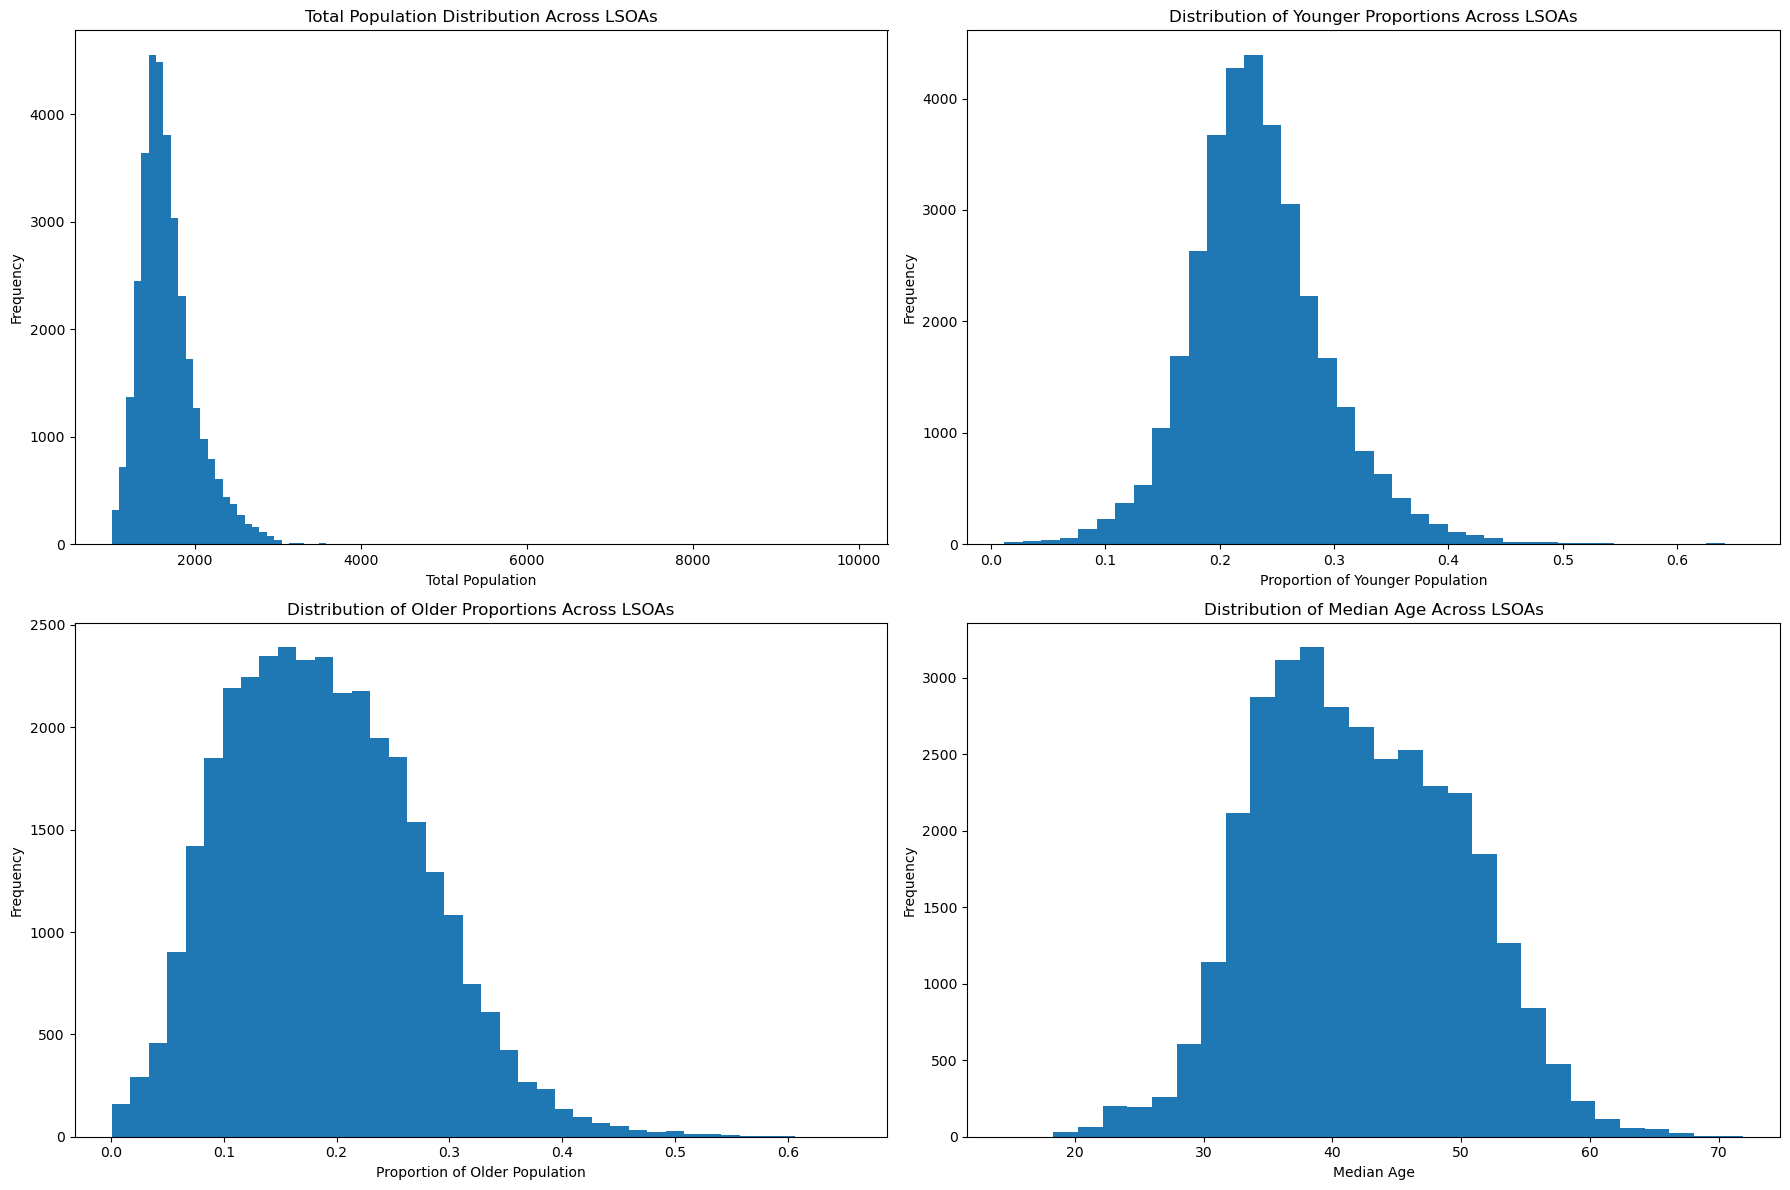

In [125]:
import matplotlib.pyplot as plt

# Create a figure with 4 subplots arranged in 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# 1. Show summary statistics and distribution of total population
print("Summary statistics of total population:")
print(eng_ages.describe()) 

total_lsoa = eng_ages.sum(axis=1, numeric_only=True)
axs[0, 0].hist(total_lsoa, bins=100)  # Increase number of bins for better granularity
axs[0, 0].set_title('Total Population Distribution Across LSOAs')
axs[0, 0].set_xlabel('Total Population')
axs[0, 0].set_ylabel('Frequency')

# 2. Show distributions of younger proportions
print("Summary statistics of younger proportions:")
print(younger_eng.describe())

axs[0, 1].hist(younger_eng, bins=40)  # Adjust bins for the younger population proportions
axs[0, 1].set_title('Distribution of Younger Proportions Across LSOAs')
axs[0, 1].set_xlabel('Proportion of Younger Population')
axs[0, 1].set_ylabel('Frequency')

# 3. Show distributions of older proportions
print("Summary statistics of older proportions:")
print(older_eng.describe())

axs[1, 0].hist(older_eng, bins=40)  # Adjust bins for the older population proportions
axs[1, 0].set_title('Distribution of Older Proportions Across LSOAs')
axs[1, 0].set_xlabel('Proportion of Older Population')
axs[1, 0].set_ylabel('Frequency')

# 4. Show distributions of median age
eng_medians = pd.DataFrame(data={'Index': list(eng.index), 'Median': median_LSOA})
print("Summary statistics of median age:")
print(eng_medians.describe())

axs[1, 1].hist(eng_medians['Median'], bins=30)  # Adjust bins for median age
axs[1, 1].set_title('Distribution of Median Age Across LSOAs')
axs[1, 1].set_xlabel('Median Age')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlap and show plots
plt.tight_layout()
plt.show()

### Median England 
Calculate the median age for the whole of England and compare it with the 50th percentile value of the distribution of median ages by LSOA. Explain why the two values differ a little.

**Answer:** The two values might differ because of the method used to calculate the median. The median age for the whole of England is 40.04, while the 50th percentile of the median ages by LSOA is 41.46. This difference is due to the methods used. The national median considers the total population across all age ranges, while the LSOA median is calculated individually for each LSOA, and then the median of these values is taken.

LSOAs with disproportionately older or younger populations can affect the LSOA median distribution, slightly shifting the overall median. For instance, LSOAs with a higher concentration of older residents raise the LSOA median, while those with younger populations lower it, leading to a small discrepancy between the national median and the median of LSOAs.

In [118]:
# Use dataset obtained before with total population of England by ages (columns)
Total= new_eng.iloc[0]

new_eng_cum= new_eng.drop(new_eng.index[0]) #Delete first row containing total value of population
new_eng_cum

#Calculate cumulative totals
new_ages_cum= np.cumsum(new_eng_cum)
#Divide cumulative totals by total number of individuals in each age borough
#Create a new pandas series with proportions

new_ages_cumtotals= new_ages_cum.div(new_ages_cum.loc['Age85Over'])
new_ages_cumtotals

# Apply function to get median age of the total population
def findMedian_series(eng_ages_cumtotals): # Define a new function because we are operating with a series, not a dataframe
    median= None
    result= None
    
    for index in range(eng_ages_cumtotals.shape[0]):
            if eng_ages_cumtotals.iloc[index] > 0.50:
                median_range=eng_ages_cumtotals.iloc[index]
                
                prev_fract= eng_ages_cumtotals.iloc[ index-1]
                fract_increase= eng_ages_cumtotals.iloc[index]- prev_fract
                remaining_fract= 0.50- prev_fract
                result=int(eng_ages_cumtotals.index[index][3:5])+  0.5* (remaining_fract/fract_increase)
                median= result.item()
                break  
            
    return median
    
population_median= findMedian_series(new_ages_cumtotals)

print('The median age for the whole of England is {}, compared to the 50th percentile value of the distribution of median ages by LSOA, which is {}.'.format(population_median, float(eng_medians.describe().loc['50%'].item())))


The median age for the whole of England is 40.04322611250074, compared to the 50th percentile value of the distribution of median ages by LSOA, which is 41.46067415730337.


## Part 3: Comparing the Median Age Distributions by Area Type  

The aim of this section is to compare distributions, grouping the LSO areas by type. The area
types are given by the PartOfCode variable, as follows.

### Add the type of area to each LSO area and group data by the area type  
Add the type of area to each LSO area. Group the data by the area type.

In [119]:
#Create a function that takes PartOfCode as its argument and returns an area type
def getAreaType(areaCode):
    areaType= None
    if areaCode[0:3]== 'E06':
        areaType= 'Unitary Authorities'
    elif areaCode[0:3]== 'E07':
        areaType= 'Non-metropolitan Districts' 
    elif areaCode[0:3]== 'E08':
        areaType= 'Metropolitan Districts'
    elif areaCode[0:3]== 'E09':
        areaType= 'London Borough'
    return areaType
    

getAreaType("E06000001") 

#Use the function with apply and assign to create a new dataset from eng with a new column with the area type
eng_areas= eng.assign(AreaType = eng.PartOfCode.apply(getAreaType))

# Group the data by area type using the groupby() function
engbyArea= eng_areas.groupby(by ='AreaType', dropna=False)
engbyArea.get_group('Metropolitan Districts')
                             



,LSOAName,PartOfCode,PartOfName,Total,Age4Under,Age5to9,Age10to14,Age15to19,Age20to24,Age25to29,...,Age60to64,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over,YoungerResidents,OlderResidents,Median Age,AreaType
LSOACode,,,,,,,,,,,,,,,,,,,,,
E01004766,Bolton 005A,E08000001,Bolton,1658,106,89,84,85,92,97,...,98,72,89,69,61,96,0.206273,0.233414,43.076923,Metropolitan Districts
E01004767,Bolton 005B,E08000001,Bolton,1891,102,100,105,90,124,156,...,102,79,93,64,58,64,0.211528,0.189318,40.291096,Metropolitan Districts
E01004768,Bolton 001A,E08000001,Bolton,1596,71,84,90,107,77,67,...,112,100,118,66,30,29,0.232456,0.214912,47.916667,Metropolitan Districts
E01004769,Bolton 003A,E08000001,Bolton,1505,58,66,94,71,66,66,...,104,85,98,70,49,27,0.215947,0.218605,47.570755,Metropolitan Districts
E01004770,Bolton 003B,E08000001,Bolton,1520,73,94,110,97,58,58,...,92,81,104,83,70,48,0.270395,0.253947,45.630631,Metropolitan Districts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E01035624,Gateshead 029D,E08000037,Gateshead,1556,58,74,105,71,55,82,...,128,131,125,82,50,57,0.228149,0.285990,50.206186,Metropolitan Districts
E01035625,North Tyneside 007E,E08000022,North Tyneside,1821,127,131,111,104,81,151,...,98,80,60,37,21,15,0.250961,0.116969,36.015152,Metropolitan Districts
E01035626,North Tyneside 007F,E08000022,North Tyneside,1870,151,136,133,71,72,166,...,64,64,57,30,11,15,0.252941,0.094652,35.153061,Metropolitan Districts


### Plot the distributions of the median age for the 4 different areas
We choose to plot the distributions of the median age for the 4 different areas with histograms, since it makes it easier to compare them.

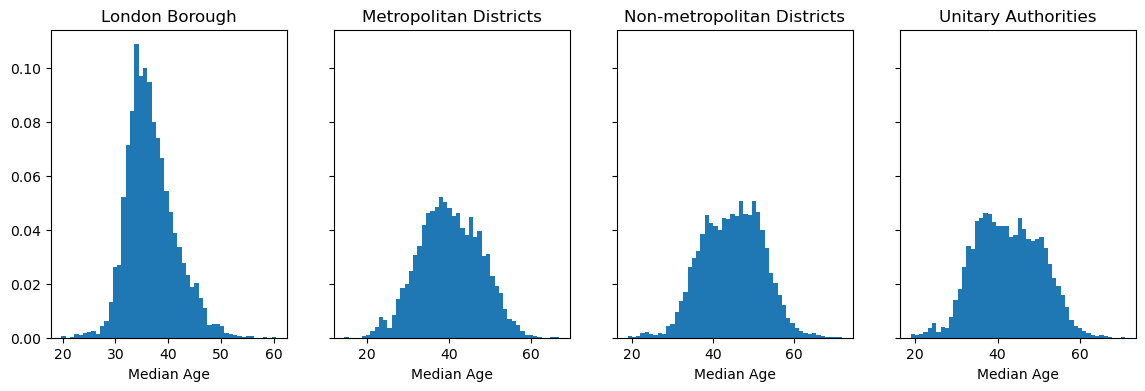

<Figure size 640x480 with 0 Axes>

In [120]:
# Histogram Method 2

import matplotlib.pyplot as plt

# Create the figure with 4 subplots (1 row, 4 columns)
fig, axs = plt.subplots(1, 4, figsize=(14, 4), sharey=True)

# Define the area types
area_types = ['London Borough', 'Metropolitan Districts', 'Non-metropolitan Districts', 'Unitary Authorities']

# Iterate through area types and plot histograms on corresponding axes
for i, area_type in enumerate(area_types):
    # Filter the data for each area type
    data = eng_areas[eng_areas['AreaType'] == area_type]['Median Age']
    
    # Plot the histogram on the corresponding axis
    axs[i].hist(data, bins=50, density=True)
    
    # Set the title and labels
    axs[i].set_title(area_type)
    axs[i].set_xlabel('Median Age')

# # Set a shared ylabel (since all histograms share the y-axis)
# axs[0].set_ylabel('Density')

# Show the plot
plt.show()
plt.tight_layout()


###  Comment briefly on the differences between the distribution for the four area types

Using a uniform y-axis for density for all four plots,, we can see that they all approximate the normal distribution. The distribution for area type London Borough shows a clear mode at around 35 years old and is slightly skeewed to the right. The others are al similar, with differences in the mean age.


## Part 4: Classification of Unusual Areas by Proportions 

The aim of this section is to look at the relationship between the younger and older
proportions across the LSO areas. 
4. Use a pivot table to calculate the number of areas of each class in each type of area.
Excluding the ‘normal’ areas, plot a bar chart of the counts. Comment on the results.

### Scatter plot of younger vs. older residents 
Draw a scatter plot of the younger proportion versus the older proportion, with each LSO area as one data point.

<Axes: xlabel='YoungerResidents', ylabel='OlderResidents'>

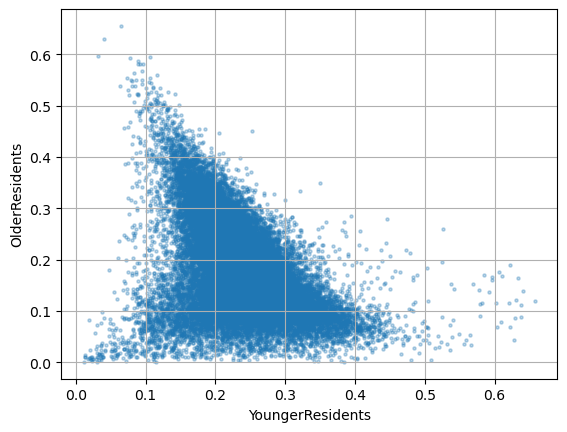

In [121]:
# Create a new dataset containing only the columns of propotion of older and younger residents
younger_older= eng.loc[:, ['OlderResidents', 'YoungerResidents']]

# Draw a scatter plot of the younger proportion versus the older proportion, with each LSO area as one data point.
younger_older.plot(kind='scatter',  x='YoungerResidents', y='OlderResidents',
                   alpha= .3, s=5, grid= 'True') #alpha= .3 makes datapoints transparent and s=5 makes markers smaller 



### Shape of Scatter Plot 
Comments on the overall shape of this scatter plot, considering both the area
containing most points and the extremes: The scatterplot shows a high proportion of the datapoints for each LSO area accumulated close to small proportion values. That is, there are a lot of LSO areas with a 20% to 40% of younger residents and 10% to 40% of older individuals. The distribution shows to be tilted towards the left, showing more extreme values towards higher proportions of younger residents an lower proportions of older residents.

### Identify and define 'extreme' areas
The shape of the scatter plot roughly triangular, with three ‘extreme’ corners. We can give the three extreme areas the following names:

- Area with high proportion of younger residents and lower proportion of older residents can be denominated: **School areas**. It corresponds to right corner of the triangle displayed in the distribution.
- Area with low proportion of both older and younger residents may be called: **Working Area**. This area corresponds to the left corner of the triangle displayed in the distribution.
- Area with high proportion of older residents and lower proportion of younger residents can be called: **Costal or rural area**. In the scatterplot it corresponds to the top left corner of the triangle.

**Define rules using ranges of the two proportions to classify each LSOA as ‘normal’ (most areas) or belonging to one of the extremes (a few areas). Add a variable with the class of each area to the data frame.**

In [122]:
#Define rules to identify extreme areas, according to values of younger and older proportions
#Create a function that takes PartOfCode as its argument and returns an area type
def getAreaClass(row):
    younger= row['YoungerResidents']
    older= row['OlderResidents']
    if younger> 0.45 and older< 0.05:
        return 'School Area'
    elif younger< 0.1 and older< 0.05:
        return 'Working Area'
    elif younger < 0.15 and older> 0.5:
        return 'Costal or Rural Area'
    else:
        return 'Normal Area'
        
# Add a variable with the class of each area to the data frame.
# Apply the function row-wise (axis=1) and create a new column in the data frame with the class of each area
eng_areas_types = eng_areas.assign(AreaClass=eng_areas.apply(getAreaClass, axis=1)) 
eng_areas_types

,LSOAName,PartOfCode,PartOfName,Total,Age4Under,Age5to9,Age10to14,Age15to19,Age20to24,Age25to29,...,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over,YoungerResidents,OlderResidents,Median Age,AreaType,AreaClass
LSOACode,,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,E09000001,City of London,1473,52,34,32,23,90,159,...,119,102,57,57,35,0.082145,0.251188,44.276316,London Borough,Normal Area
E01000002,City of London 001B,E09000001,City of London,1384,33,24,22,31,100,166,...,76,69,59,43,30,0.071532,0.200145,43.913043,London Borough,Normal Area
E01000003,City of London 001C,E09000001,City of London,1613,39,32,33,23,96,187,...,86,85,50,31,33,0.075015,0.176689,43.896396,London Borough,Normal Area
E01000005,City of London 001E,E09000001,City of London,1101,52,45,35,89,118,97,...,35,26,17,14,12,0.185286,0.094460,34.851695,London Borough,Normal Area
E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,1842,153,127,110,122,124,130,...,66,41,18,17,16,0.254615,0.085776,34.454023,London Borough,Normal Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E01035758,Vale of White Horse 014H,E07000180,Vale of White Horse,1169,39,45,58,38,63,91,...,57,70,46,70,77,0.170231,0.273738,44.888060,Non-metropolitan Districts,Normal Area
E01035759,Vale of White Horse 015G,E07000180,Vale of White Horse,1519,116,107,82,66,62,113,...,56,75,58,29,32,0.221856,0.164582,40.027473,Non-metropolitan Districts,Normal Area
E01035760,Vale of White Horse 015H,E07000180,Vale of White Horse,1610,206,152,97,49,59,161,...,14,15,13,20,33,0.245342,0.059006,31.716102,Non-metropolitan Districts,Normal Area


### Plot counts of area class per area type 
In the following code two steps are done: 
- Use a pivot table to calculate the number of areas of each class in each type of area.
- Excluding the ‘normal’ areas and plot a bar chart of the counts. 

<Axes: title={'center': 'Count of Area Class per Area Type'}, xlabel='AreaType'>

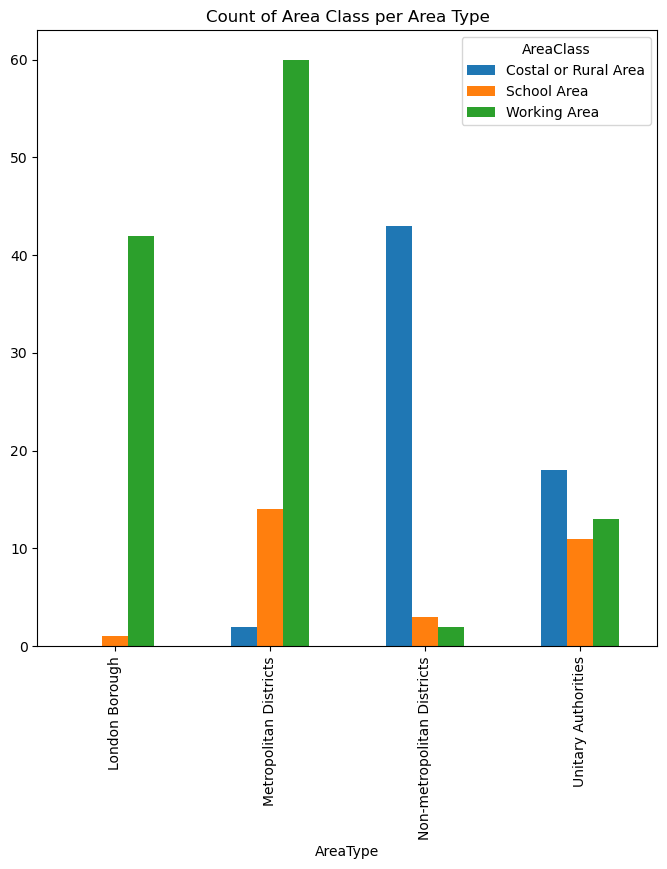

In [123]:
#Create a pivot table to calculate the number of areas of each class in each type of area
class_type_count= eng_areas_types.pivot_table(index='AreaType', columns= ['AreaClass'], values=['Total'], aggfunc='count')
class_type_count.columns= class_type_count.columns.droplevel()

# Exclude normal area from dataset and plot a bar chat of the data counts from the new dataframe
class_type_count
class_type_count.loc[:,['Costal or Rural Area','School Area', 'Working Area']].plot(kind= 'bar', figsize=(8,8), title= 'Count of Area Class per Area Type')


**Interpretation of the bar chart:** The barchart shows that Costal or Rural areas are mainly present in Non-metropolitan districts, followed by Unitary Authorities, which makes sense. Next, school areas show to mainly be present in Metropolitan Districts, followed by Unitary Authorities, suggesting schools to be common inside cities. And lastly, working area show to be present mainly in Metropolitan districts and London Boroughs, consistent with the presence of office buildings in the inner areas of cities. 